# Video Game Sales: 1983 - 2019

**EMAT 22110 - Data in Emerging Media and Technology**

**Author: Terra Kincy**

**Created:** 04/ 26/ 21

**Last updated:** 05/ 12/ 21

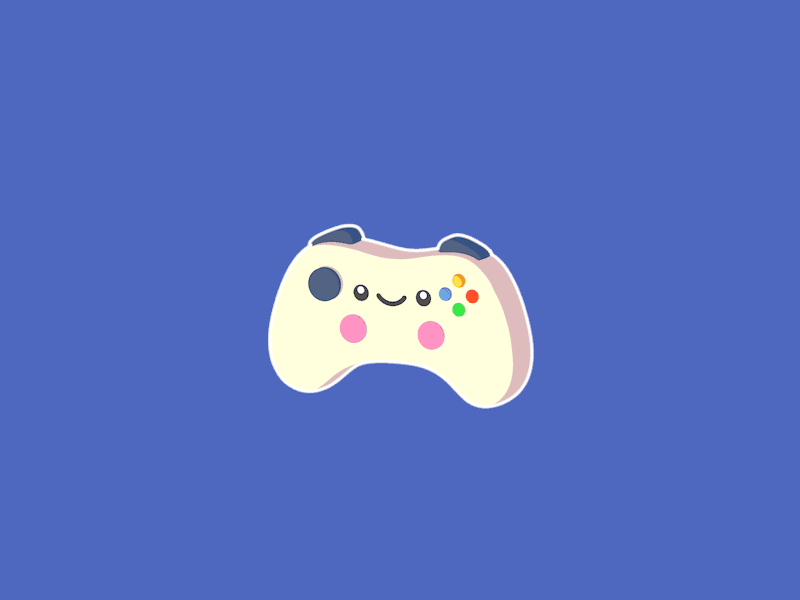

## Description

This dataset contains a list of video game sales from 1983 to 2019. The file was obtained from Kaggle.com.

##### Fields of focus as seen in the data file
- name: the names of each game.
- platform: the platforms the games were released on.
- year: the years the games were released.
- genre: the genres of the games.
- publisher: the publishers of the games.
- na_sales: sales within North America (in millions).
- eu_sales: sales within Europe (in millions).
- jp_sales: sales within Japan (in millions).
- other_sales: sales in the rest of the world (in millions).
- global_sales: total of worldwide sales.

## Objective

**How have gamer buying trends changed throughout the years?**

In this project I will focus on conducting an exploratory analysis to answer the leading question above. The objective is to understand how the data is distributed and to generate information on how game buying decisions were made. This goal of this analysis is to explore the data intuitively and informatively. 

## Outline

#### 1. Loading the Data
- Libraries
- Loading in the File
- Summary of the Data

#### 2. Descriptive Statistics
- Frequency Distributions
- Trend Measurements

#### 3. Exploratory Analysis
- Best-selling games
- Sales per Platform
- Sales per Genre
- Sales per Publisher
- Sales per year

#### 4. Conclusion


## 1. Loading the Data

### A. Libraries

The libraries I will be using are [matplotlib](https://matplotlib.org/stable/api/index.html), [numpy](https://numpy.org/doc/stable/user/whatisnumpy.html), [pandas](https://pandas.pydata.org/), [seaborn](https://seaborn.pydata.org/#:~:text=Seaborn%20is%20a%20Python%20data,can%20read%20the%20introductory%20notes.), and [statistics: mean, median, mode.](https://docs.python.org/3/library/statistics.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from statistics import mean, median, mode, stdev

sns.set()
pd.set_option('display.max_rows',16)
pd.set_option('display.max_columns',100)
plt.style.use('ggplot')

### B. Loading in the File

In [2]:
vgSales = pd.read_csv('/Users/terra/Downloads/SpringSemester/EMAT/Final/archive/videogameglobalsales.csv')
vgSales.keys()

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

### C. Summary of the Data

Running the data and looking at each element is important to understanding how the data is structured. This will help you identify what elements could potentially be outliers, find if there is repeating data, and figure out how the information can be manipulated. With csv files the data structure is very similar across the board, but, still, we can load up a couple of the index objects and run a table to make sure everything looks as it should.

In [3]:
vgSales['platform']

0        Wii
1        NES
2        Wii
3        Wii
4         GB
        ... 
16593    GBA
16594     GC
16595    PS2
16596     DS
16597    GBA
Name: platform, Length: 16598, dtype: object

In [4]:
vgSales['global_sales']

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: global_sales, Length: 16598, dtype: float64

In [5]:
vgSales.head(10)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## 2. Descriptive Statistics

Now that we have imported the data and have a general understanding of how the data is structured, we begin to observe the general behaviour of the data. This allows us to better facilitate problem solving. To do-so we can go more in depth by looking at patterns, trends, and differences within the data.

### A. Frequency Distributions

First, we can summarize the categorial variables by seperating each varibale based on the number of times they occur.

#### Years

In [6]:
freqYear = vgSales[['year']].value_counts('year', ascending = False)

In [7]:
year_counts = pd.DataFrame.from_dict(dict(freqYear), orient='index')

In [8]:
year_counts = year_counts.rename(columns = {0 : 'Freq'})
year_counts.head(10)

,Freq
2009.0,1431
2008.0,1428
2010.0,1259
2007.0,1202
2011.0,1139
2006.0,1008
2005.0,941
2002.0,829
2003.0,775
2004.0,763


Text(0, 0.5, 'Number of Games Sold')

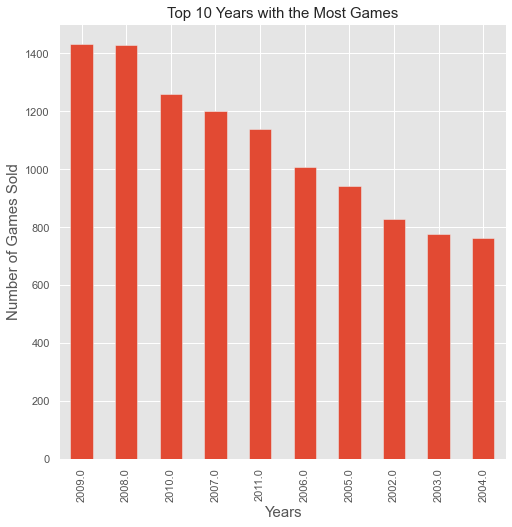

In [9]:
fig,ax = plt.subplots(figsize=(8,8))
vgSales['year'].value_counts(sort=True).head(10).plot(kind='bar',ax=ax,rot =90)
plt.title('Top 10 Years with the Most Games',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Games Sold',fontsize=15)

#### Platforms

In [10]:
freqPlat = vgSales[['platform']].value_counts('platform', ascending = False)
# print(freqPlat)

In [11]:
print(vgSales[['platform']].value_counts('platform', ascending = False))

platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
        ... 
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Length: 31, dtype: int64


In [12]:
plat_counts = pd.DataFrame.from_dict(dict(freqPlat), orient='index')

In [13]:
plat_counts = plat_counts.rename(columns = {0 : 'Freq'})
plat_counts.head(10)

,Freq
DS,2163
PS2,2161
PS3,1329
Wii,1325
X360,1265
PSP,1213
PS,1196
PC,960
XB,824
GBA,822


Text(0, 0.5, 'Number of Games Sold')

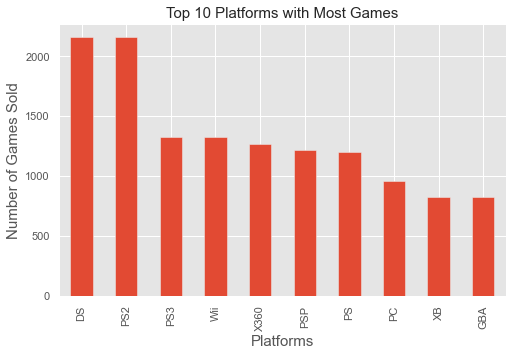

In [14]:
fig,ax = plt.subplots(figsize=(8,5))
vgSales['platform'].value_counts(sort=True).head(10).plot(kind='bar',ax=ax,rot =90)
plt.title('Top 10 Platforms with Most Games',fontsize=15)
plt.xlabel('Platforms',fontsize=15)
plt.ylabel('Number of Games Sold',fontsize=15)

**Publishers**

In [15]:
freqPub = vgSales[['publisher']].value_counts('publisher', ascending = False)

In [16]:
pub_counts = pd.DataFrame.from_dict(dict(freqPub), orient='index')

In [17]:
pub_counts = pub_counts.rename(columns = {0 : 'Freq'})
pub_counts.head(10)

,Freq
Electronic Arts,1351
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
THQ,715
Nintendo,703
Sony Computer Entertainment,683
Sega,639
Take-Two Interactive,413


Text(0, 0.5, 'Number of Games Sold')

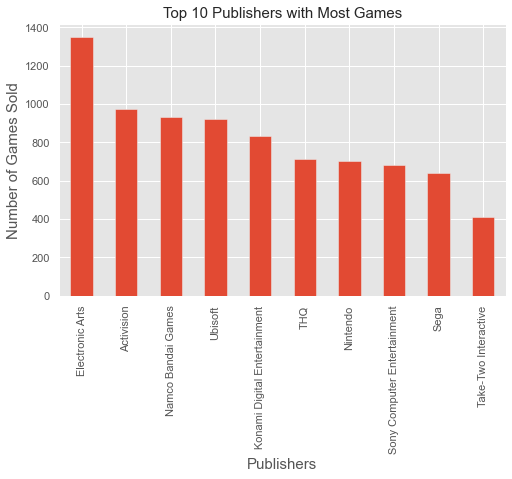

In [18]:
fig,ax = plt.subplots(figsize=(8,5))
vgSales['publisher'].value_counts(sort=True).head(10).plot(kind='bar',ax=ax,rot =90)
plt.title('Top 10 Publishers with Most Games',fontsize=15)
plt.xlabel('Publishers',fontsize=15)
plt.ylabel('Number of Games Sold',fontsize=15)

#### Names

The purpose of frequency data in some cases could also be for testing purposes. In this case, I assumed that each game would be listed one time, but it can be seen that several games appear in the data multiple times. This information is important to know because when we look at overall game sales, having the sales of the same game being seperated could scew the data and lead to a false report. So, it will be important to address this when entering the exploratory analysis phase.

In [19]:
repeats = vgSales['name'].value_counts(sort=True)

print(repeats)

Need for Speed: Most Wanted                                          12
Madden NFL 07                                                         9
LEGO Marvel Super Heroes                                              9
Ratatouille                                                           9
FIFA 14                                                               9
                                                                     ..
World Soccer Jikkyou Winning Eleven 2000: U-23 Medal heno Chousen     1
Dance Dance Revolution SuperNOVA                                      1
Lunacy                                                                1
Bob the Builder: Can We Fix It?                                       1
Final Fantasy X-2                                                     1
Name: name, Length: 11493, dtype: int64


#### Sales

Because I ran code to look at frequency data for na_sales, I am able to see that frequency distribution data for sales is irrelevant to my gathering process.

This information is not valuable to the findings of my report because I want to focus on overall sales in relation to other aspects of the data, rather than the frequency of sales themselves.

In [20]:
vgSales['na_sales'].value_counts(sort=True).head(5)

0.00    4499
0.02     550
0.01     541
0.03     533
0.05     530
Name: na_sales, dtype: int64

### B. Trend Measurements

A general idea of the sales data can be described by calculating the central tendencies: mean, median, and mode. With this information, a test can be done on the distributions to see if they are skewed or normal.

In [21]:
# Mean, Median, and Mode. Is this useful Information for the conclusion I want to make?

print("Means", "\n")
print("NA Sales -", mean(vgSales['na_sales']))
print("EU Sales -",mean(vgSales['eu_sales']))
print("JP Sales -",mean(vgSales['jp_sales']))
print("Global Sales -",mean(vgSales['global_sales']))

Means 

NA Sales - 0.2646674298108206
EU Sales - 0.14665200626581515
JP Sales - 0.07778166044101699
Global Sales - 0.5374406555006628


In [22]:
print("Medians", "\n")
print("NA Sales -", median(vgSales['na_sales']))
print("EU Sales -", median(vgSales['eu_sales']))
print("JP Sales -", median(vgSales['jp_sales']))
print("Global Sales -", median(vgSales['global_sales']))

Medians 

NA Sales - 0.08
EU Sales - 0.02
JP Sales - 0.0
Global Sales - 0.17


In [23]:
print("Modes", "\n")
print("NA Sales -", mode(vgSales['na_sales']))
print("EU Sales -", mode(vgSales['eu_sales']))
print("JP Sales -", mode(vgSales['jp_sales']))
print("Global Sales -", mode(vgSales['global_sales']))

Modes 

NA Sales - 0.0
EU Sales - 0.0
JP Sales - 0.0
Global Sales - 0.02


There is no worry with the mode be 0.0 for majority of the secitons because the sells are listed in millions. So, if a game sells fifty-thousand copies, then that would be listed as 0.05. This is likely the case with the sales of many games in the dataset.

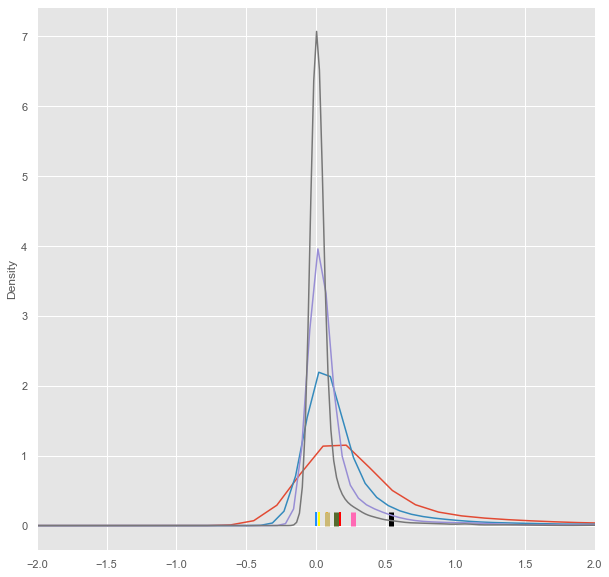

In [24]:
central_global = vgSales['global_sales']

central_global.plot(kind="density",
              figsize=(10,10),
              xlim=(-2,2));

central_na = vgSales['na_sales']

central_na.plot(kind="density",
              figsize=(10,10),
              xlim=(-2,2));

plt.vlines(central_global.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=5.0,
            color="black");

plt.vlines(central_global.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2, 
           linewidth=2.0,
           color="red");

plt.vlines(central_na.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=5.0,
            color="hotpink");

plt.vlines(central_na.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2, 
           linewidth=2.0,
           color="orange");

central_eu = vgSales['eu_sales']

central_eu.plot(kind="density",
              figsize=(10,10),
              xlim=(-2,2));

central_jp = vgSales['jp_sales']

central_jp.plot(kind="density",
              figsize=(10,10),
              xlim=(-2,2));

plt.vlines(central_eu.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=5.0,
            color="darkolivegreen");

plt.vlines(central_eu.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2, 
           linewidth=2.0,
           color="yellow");

plt.vlines(central_jp.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=5.0,
            color="y");

plt.vlines(central_jp.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2, 
           linewidth=2.0,
           color="dodgerblue");

For the most part, the data appears to be central. However, there does appear to be a slight skew in the mean of the global data. I may have to lookout for outliers in the global data, however the skew is still under the curve, so the outliers may be insignificant to my findings.

## 3. Exploratory Analysis

Using some of the information from the descriptive statistics, as well as newly collected data, I will create a hypothesis for each section of the Exploratory Analysis to answer my overall question of **How have gamer buying trends changed throughout the years?**

### A. Best-selling games

As of the dates listed within this analysis, there is only one game that has yet to be released in all countries.

In [25]:
vgSales.loc[vgSales.year > 2019, :]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In the frequency distribution data, it can be seen that some names repeat. However, I will not be adding them together to get a total sales number. Let's look at Need For Speed: Most Wanted as an example to see why it wouldn't impact the findings of this report.

In [26]:
cols = ['name','platform','year','global_sales']
vgSales.loc[vgSales.name=='Need for Speed: Most Wanted', cols].sort_values(['year'])

,name,platform,year,global_sales
252,Need for Speed: Most Wanted,PS2,2005.0,4.37
1530,Need for Speed: Most Wanted,X360,2005.0,1.29
2005,Need for Speed: Most Wanted,XB,2005.0,1.04
3585,Need for Speed: Most Wanted,GC,2005.0,0.56
5900,Need for Speed: Most Wanted,PC,2005.0,0.30
6278,Need for Speed: Most Wanted,DS,2005.0,0.27
6492,Need for Speed: Most Wanted,GBA,2005.0,0.26
498,Need for Speed: Most Wanted,PS3,2012.0,2.89
1173,Need for Speed: Most Wanted,X360,2012.0,1.58
1742,Need for Speed: Most Wanted,PSV,2012.0,1.16


Need for Speed shows up on the list several times for a couple of reasons: it was released on multiple platforms and it was released in different years. The games released in different years are considered to be different games, so I can't add them all together as a whole. Also, the sales on individual platforms are not a significant amount that would impact the graphs of the most popular games. I can assume that this is the same for all the games on the list, but to verify my findings, I will also run the same test with FIFA 14 and LEGO Marvel Super Heroes.

In [27]:
vgSales.loc[vgSales.name=='FIFA 14', cols].sort_values(['year'])

,name,platform,year,global_sales
112,FIFA 14,PS3,2013.0,6.90
256,FIFA 14,X360,2013.0,4.31
493,FIFA 14,PS4,2013.0,2.90
1698,FIFA 14,XOne,2013.0,1.19
3988,FIFA 14,PSV,2013.0,0.50
4503,FIFA 14,PC,2013.0,0.43
4538,FIFA 14,Wii,2013.0,0.43
6661,FIFA 14,3DS,2013.0,0.25
7034,FIFA 14,PSP,2013.0,0.23


In [28]:
vgSales.loc[vgSales.name=='LEGO Marvel Super Heroes', cols].sort_values(['year'])

,name,platform,year,global_sales
690,LEGO Marvel Super Heroes,X360,2013.0,2.30
846,LEGO Marvel Super Heroes,PS3,2013.0,2.00
1193,LEGO Marvel Super Heroes,PS4,2013.0,1.56
2007,LEGO Marvel Super Heroes,XOne,2013.0,1.04
2344,LEGO Marvel Super Heroes,3DS,2013.0,0.89
2774,LEGO Marvel Super Heroes,WiiU,2013.0,0.74
3080,LEGO Marvel Super Heroes,PSV,2013.0,0.66
4056,LEGO Marvel Super Heroes,DS,2013.0,0.49
8095,LEGO Marvel Super Heroes,PC,2013.0,0.18


To begin, we can graph the Top 10 Games and where sales are most popular.

In [29]:
topGameSales = vgSales.groupby(["name"])["global_sales", "na_sales", "eu_sales", "jp_sales", "other_sales"].agg("sum").reset_index()

# Top10 of videogames with more sells.
topGameSales = topGameSales.sort_values(by=["global_sales"],ascending=False).reset_index(drop=True)
# topGameSales.iloc[:10,]

<ipython-input-29-e5476de1f4f4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topGameSales = vgSales.groupby(["name"])["global_sales", "na_sales", "eu_sales", "jp_sales", "other_sales"].agg("sum").reset_index()


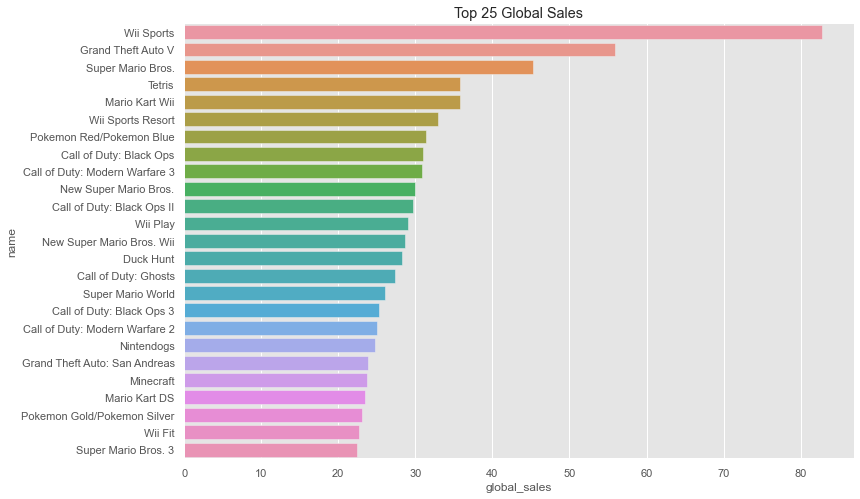

In [30]:
plt.figure(figsize=(12,8))
plt.title("Top 25 Global Sales")
sns.barplot(x='global_sales',y='name',data=topGameSales.head(25));

Text(0.5, 1.0, 'Popularity of Top 10 Games')

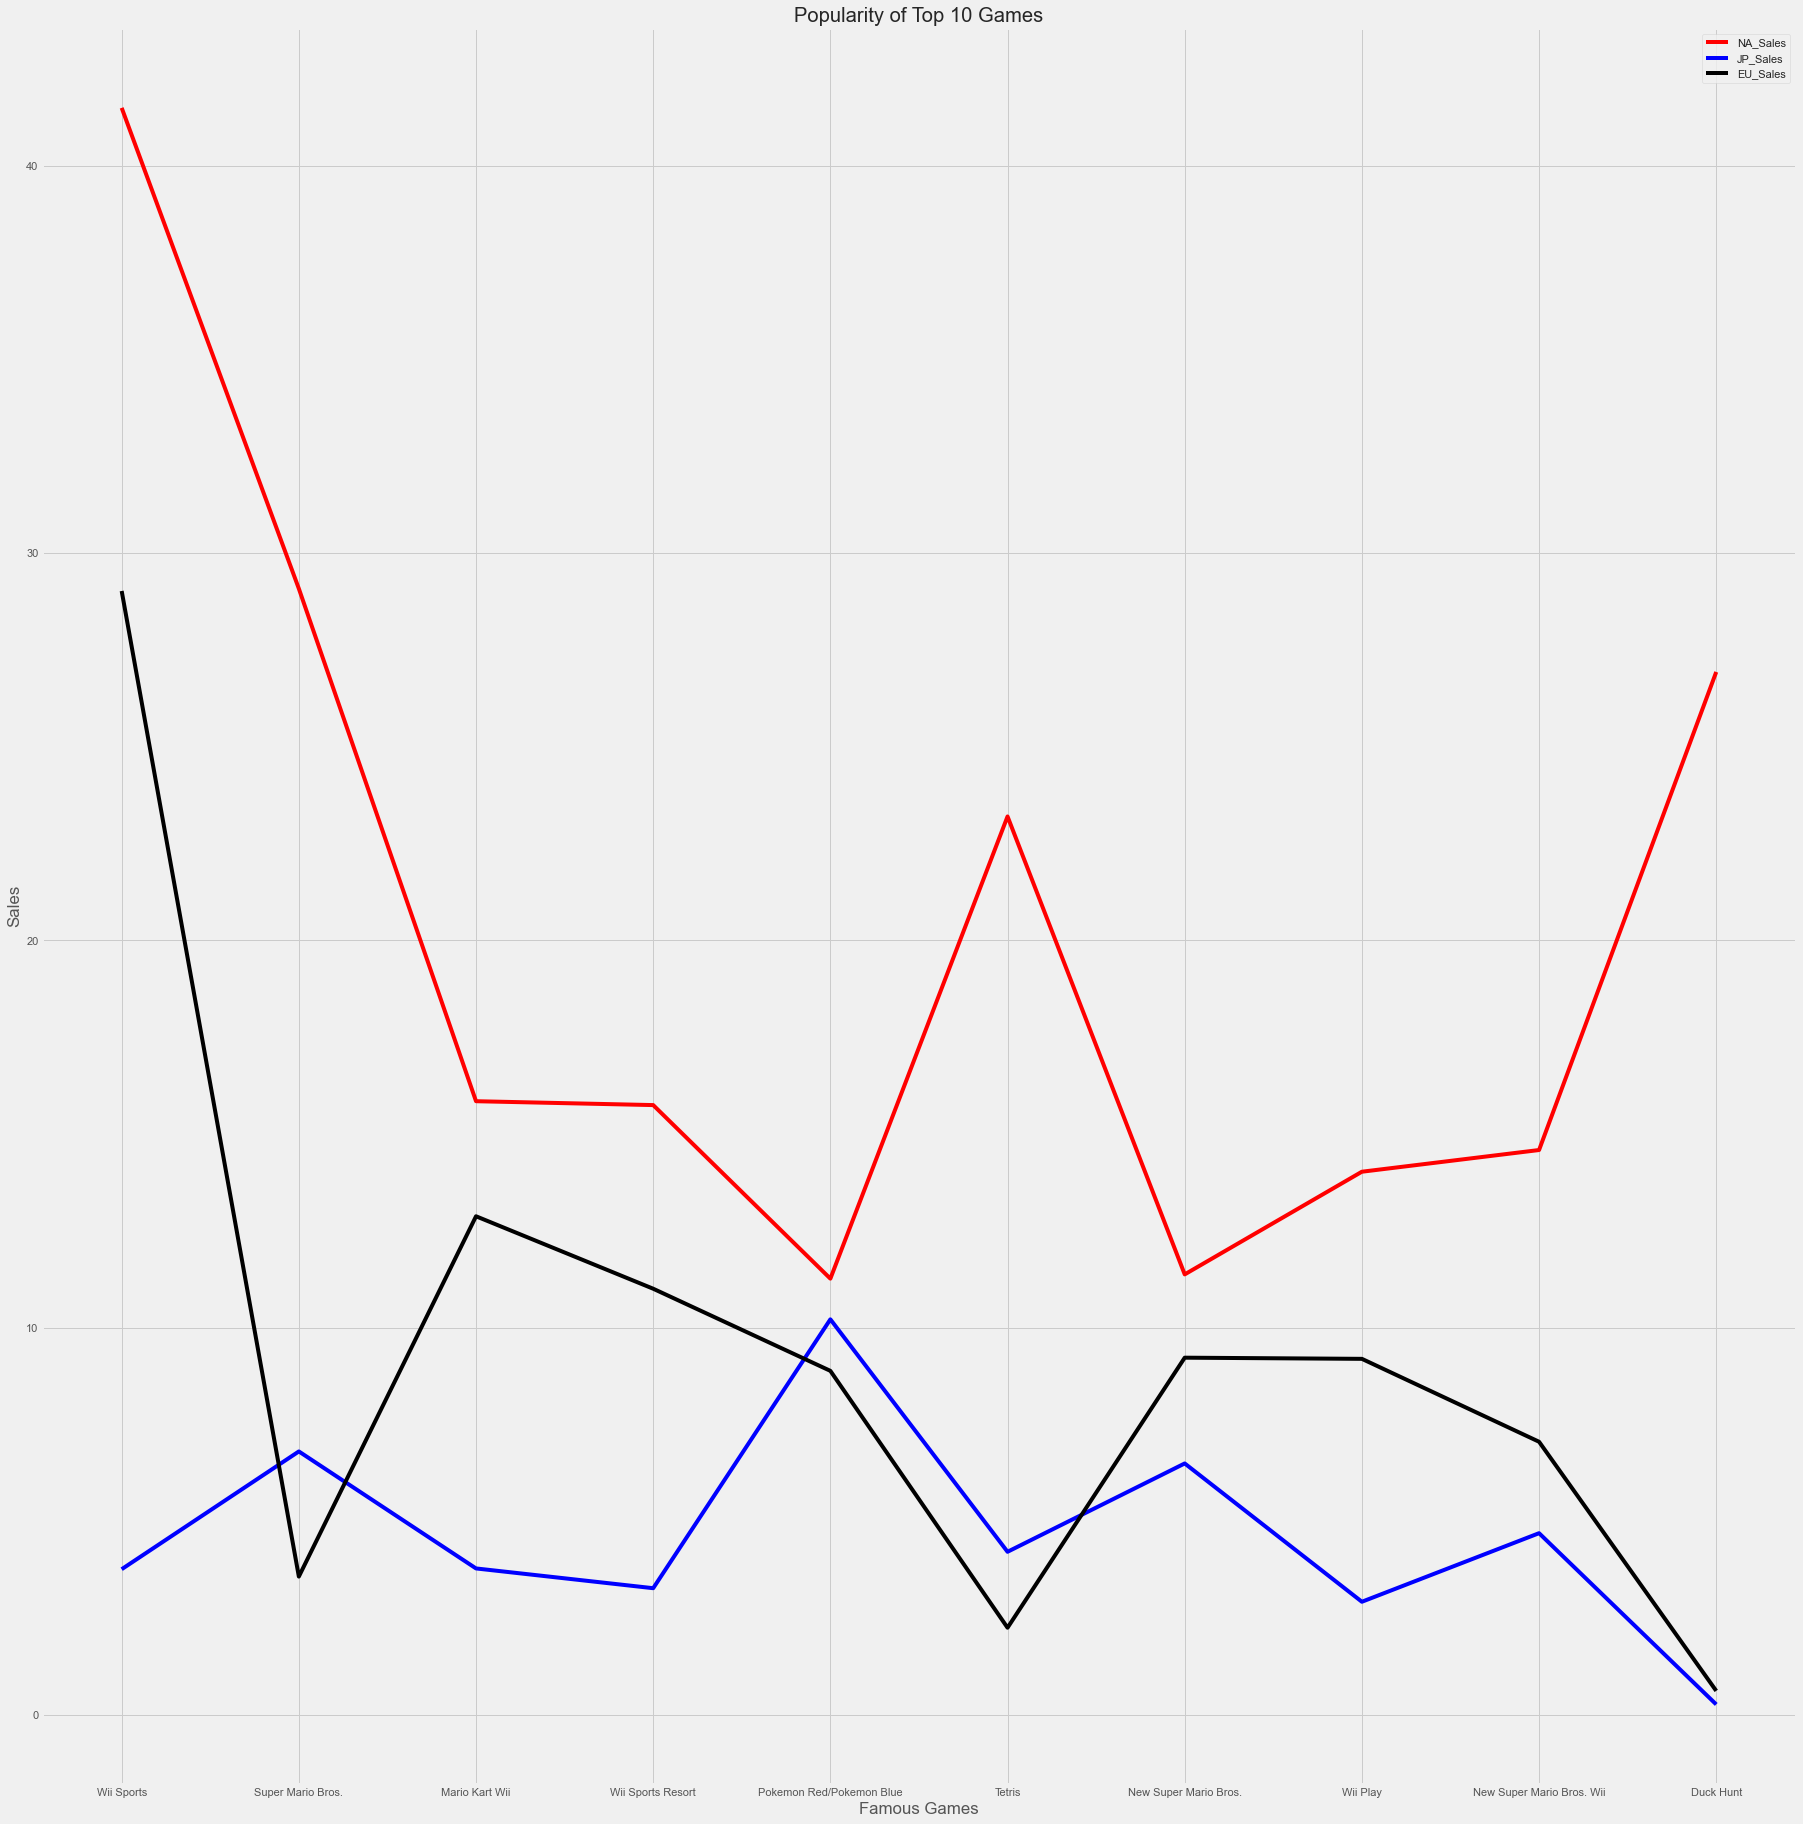

In [31]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(25,25))
plt.plot(vgSales['name'].head(10), vgSales['na_sales'].head(10), color='red', label='NA_Sales')
plt.plot(vgSales['name'].head(10), vgSales['jp_sales'].head(10), color ='blue', label='JP_Sales')
plt.plot(vgSales['name'].head(10), vgSales['eu_sales'].head(10), color='black', label='EU_Sales')
plt.tight_layout()
plt.legend()
plt.xlabel('Famous Games')
plt.ylabel('Sales')
plt.title('Popularity of Top 10 Games')

We can see that game sales are more common in North America, so it can be assumed that this is where the majority gamer fanbase is. When looking at the list of top selling games, I would guess that the top genres amongst the players are sports, action, and platform games. I will confirm or deny this theory in the "Sales per Genre" section. 

### B. Sales per Platform

Looking at the frequency distributions of titles per platforms, we could see that the Nintendo DS and the Playstation 2 have the most game titles listed. With this information, I expect to see that these two games have the most sales as well.

Text(0, 0.5, 'Platform')

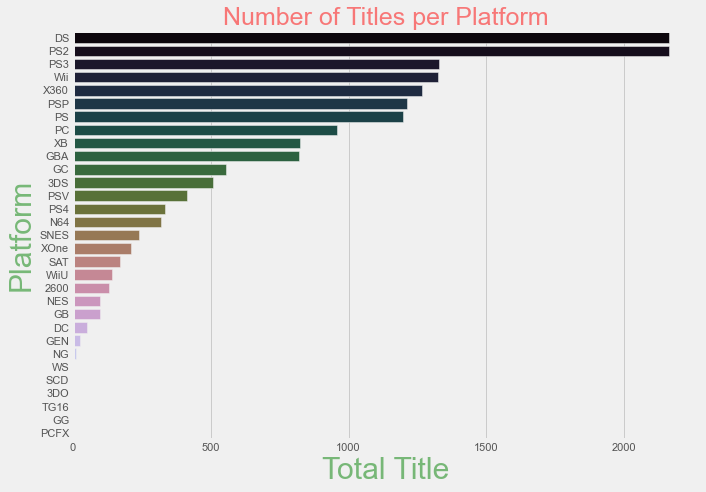

In [32]:
platform_title = vgSales.platform.value_counts()

plt.subplots(figsize=(10,7))
ax = sns.barplot(x=platform_title , y=platform_title .index, palette='cubehelix')
ax.set_title('Number of Titles per Platform', color='red', alpha=0.5, size=25)
ax.set_xlabel('Total Title', color='green', alpha=0.5, size=30)
ax.set_ylabel('Platform', color='green', alpha=0.5, size=30)

However, when the sales per platform are graphed, it can be seen that the Xbox 360 is the runner up to the Playstation 2 in sales, with the Nintendo DS coming in 5th place.

<BarContainer object of 10 artists>

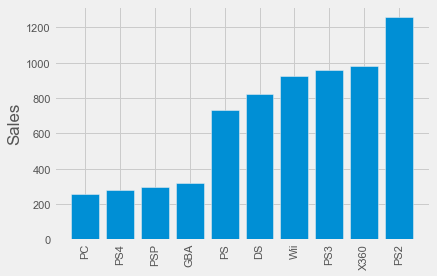

In [33]:
sales_by_platform = vgSales.groupby(["platform"])["global_sales"].sum().reset_index(name='Sum')
top_10_platform_sales = sales_by_platform.sort_values(by=["Sum"],ascending=True).tail(10)
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.bar(top_10_platform_sales["platform"], top_10_platform_sales["Sum"])

In [34]:
ds = (vgSales['platform']=='DS')
ps2 = (vgSales['platform']=='PS2')
x360 = (vgSales['platform']=="X360")

In [35]:
print('PS2 Sales - ', vgSales['global_sales'][ps2].sum())
print('XBOX 360 Sales - ', vgSales['global_sales'][ps2].sum())
print('DS Sales - ', vgSales['global_sales'][ds].sum())

PS2 Sales -  1255.6399999999999
XBOX 360 Sales -  1255.6399999999999
DS Sales -  822.49


#### Why is that?

The Playstation 2 was released in 2000, the Nintendo DS was released in 2004, and the Xbox 360 was released in 2005. With the PS2 being the first console in question to be released, it could be argued that it has the most sales simply for that reason. But how did the Xbox succeed the Nintendo DS in sales despite coming out a year later and coming in 5th for most released games?

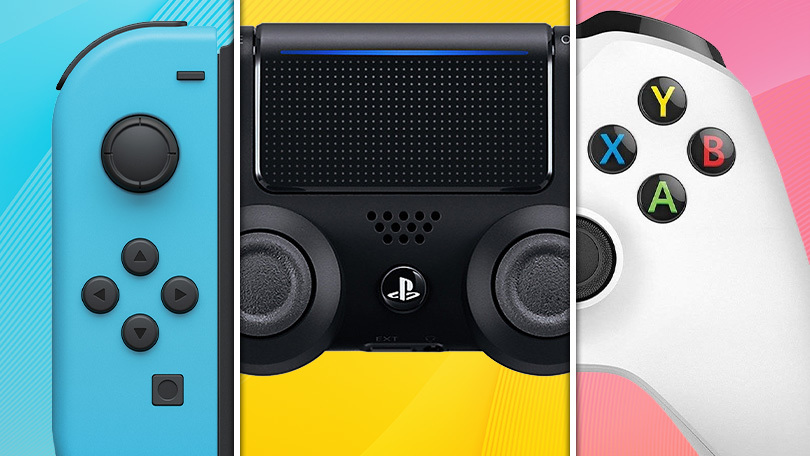

In an article titled "Why Do People Buy Consoles" poseted on [Five Minute Discussions](https://fiveminutediscussions.com/2017/10/12/why-do-people-buy-consoles/) it is stated that TV console games are more convenient and socialable, among other things. This article specifically compared TV consoles to PC gaming, but the same applies with all other competing platforms. In comparison to the Nintendo DS, I would also add that it is more powerful. The TV console has stood the test of time because it can be a relaxing device or a party device. It is accessible to everyone around, rather than a handheld console which is not as powerful and requires internet access and a seperate console to play with people who could be in the same vicinity. This is why we see consoles like the Nintendo Wii and the Playstation 3, both released in 2006, still making more in sales that the Nintendo DS.

With this information on platform sales, it could be concluded that gamers are loyal and specific on the type of games they like to play.

### E. Sales per year

The frequency distribution data shows that the most games were released between 2007 and 2011, with 2009 being at the top. I'm expecting 2009 to have the most released games, with those 5 years dominating in sales.

Text(0, 0.5, 'Number of Titles')

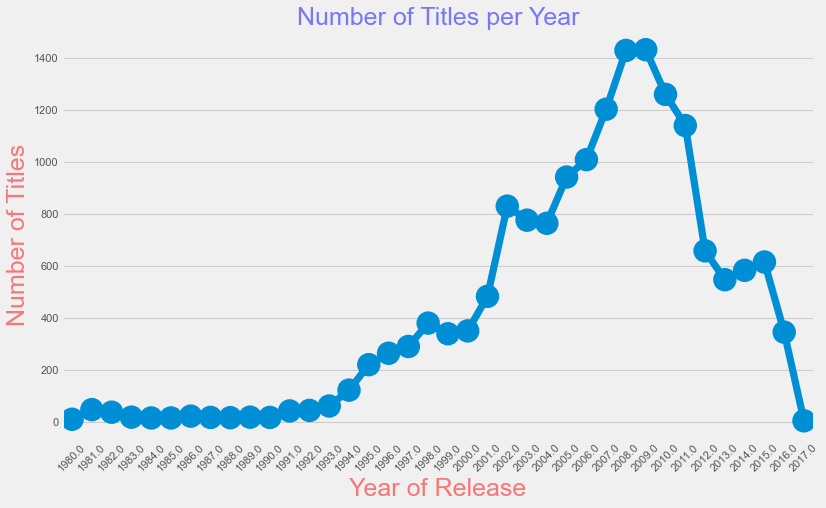

In [36]:
titles_by_year = vgSales.groupby(['year']).agg({'name':lambda x : len(x) if (len(x) > 1) else None}).dropna()
plt.subplots(figsize=(12,7))
ax = sns.pointplot(x=titles_by_year.index, y=titles_by_year.name, s=1)
g = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Number of Titles per Year', size=25, color='blue', alpha=0.5)
ax.set_xlabel('Year of Release', size=25, color='red', alpha=0.5)
ax.set_ylabel('Number of Titles', size=25, color='red', alpha=0.5)

Interestingly, the graph of titles released per year is nearly identical to the graph of sales per year.

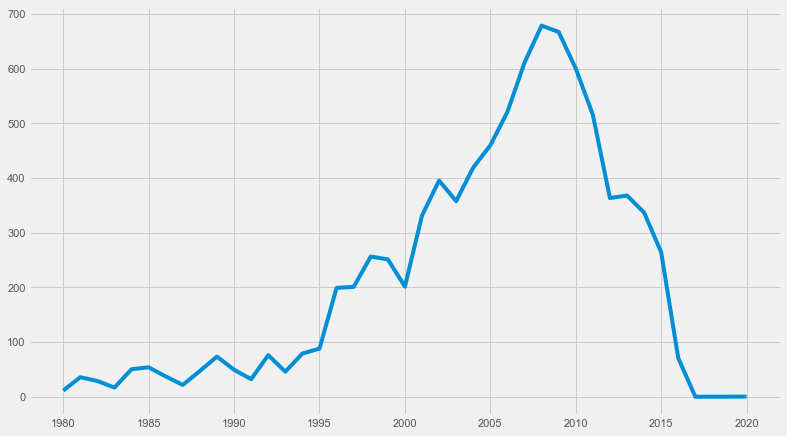

In [37]:
global_sales = vgSales.groupby(["year"])["global_sales"].sum()
plt.subplots(figsize=(12,7))
plt.plot(global_sales)

Perhaps this could be an indication that gamers are always willing to try new games.

### C. Sales per Genre

The frequency data on video game sales was not done above, but below it can be seen that the action genre had the most titles released, with sports coming in second. With the data on the top selling games sold being visiable, I expect the data for genre sales to be similar to the frequency data of titles released in those genres.

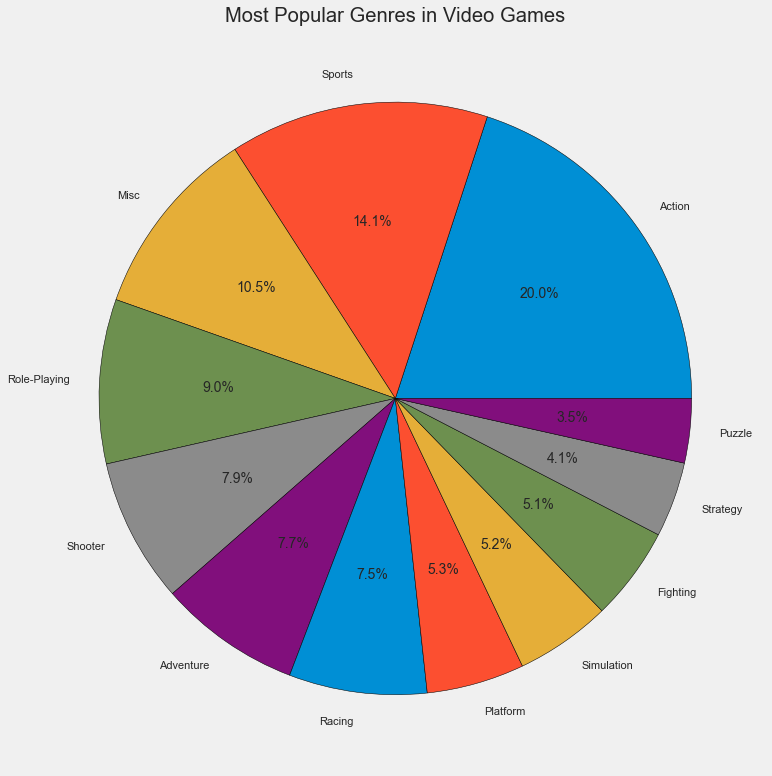

In [38]:
labels = ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']


plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(11,11))
plt.pie(list(vgSales['genre'].value_counts()), autopct='%1.1f%%', labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('Most Popular Genres in Video Games')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Global Sales')

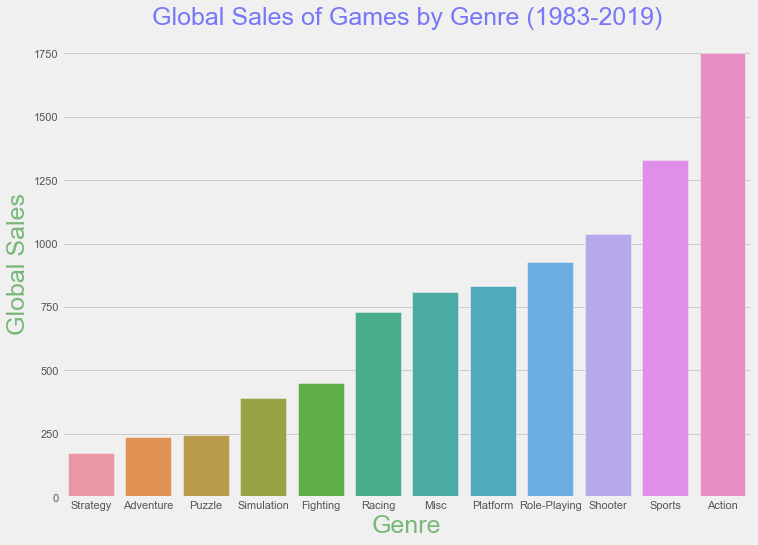

In [39]:
global_sales_by_genre = vgSales.groupby('genre').agg({'global_sales':np.sum}).sort_values('global_sales')
plt.subplots(figsize=(11,8))
ax = sns.barplot(x=global_sales_by_genre.index, y=global_sales_by_genre.global_sales)
ax.set_title('Global Sales of Games by Genre (1983-2019)', color='blue', size=25, alpha=0.5)
ax.set_xlabel('Genre', color='green', size=25, alpha=0.5)
ax.set_ylabel('Global Sales', color='green', size=25, alpha=0.5)

The data is relatiely similar. The numbers are slightly different, but the top 5 is nearly the same in both charts. Gamers enjoy action and sports games.

Again, this coinsides with the conslusion I made about platform sales, that people are loyal and specific in what they like. As predicted before in the "Best Selling Games" section, Action and Sports games are among to top genres. Even though platform games are not in the top three as I had previously suspected, it is in the top 5.

Also, in similarity to my hypothesis made in the "Best-Selling Games" section, the majority of sales per genre are within North America - aside from global sales.

Text(0, 0.5, 'Total')

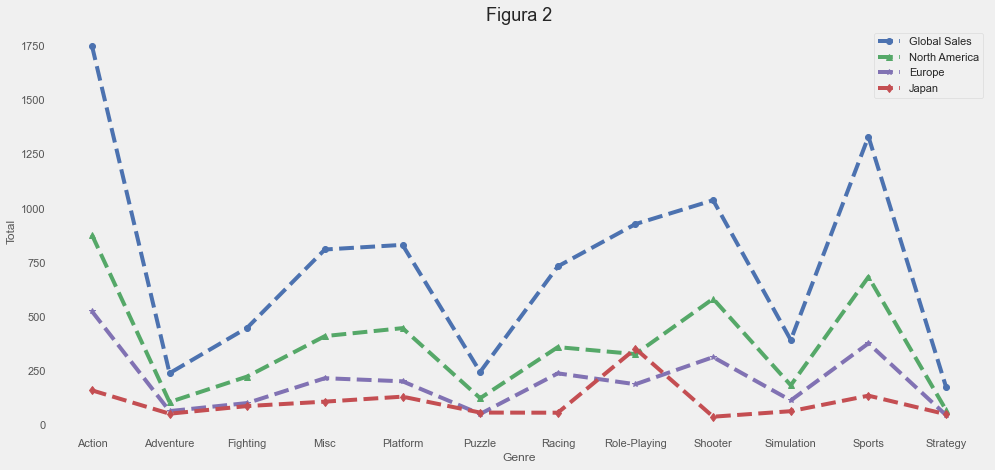

In [40]:
genre_global = vgSales.groupby(["genre"])["global_sales"].agg("sum")
genre_na = vgSales.groupby(["genre"])["na_sales"].agg("sum")
genre_eu = vgSales.groupby(["genre"])["eu_sales"].agg("sum")
genre_jp = vgSales.groupby(["genre"])["jp_sales"].agg("sum")

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(genre_global,"bo--",genre_na, "g^--", genre_eu, "m*--", genre_jp, "rd--")

ax.grid()
plt.legend(("Global Sales","North America", "Europe", "Japan"))
ax.set_title("Figura 2",fontsize=18)
ax.set_xlabel("Genre",fontsize=12)
ax.set_ylabel("Total",fontsize=12)

### D. Sales per Publisher

Based on the frequency distribution data, I expect Electronic arts to be of the most selling publishers. Along with this, 3 out of 5 of the best-selling games belong to Nintendo. So, I also expect Nintendo to be amongst the top selling publishers as well.

In [41]:
publishers = vgSales[['publisher', 'na_sales', 'eu_sales', 'jp_sales', 'global_sales']]
publishers = publishers.groupby(by=['publisher']).sum().sort_values(['global_sales'], ascending=False).head(10)

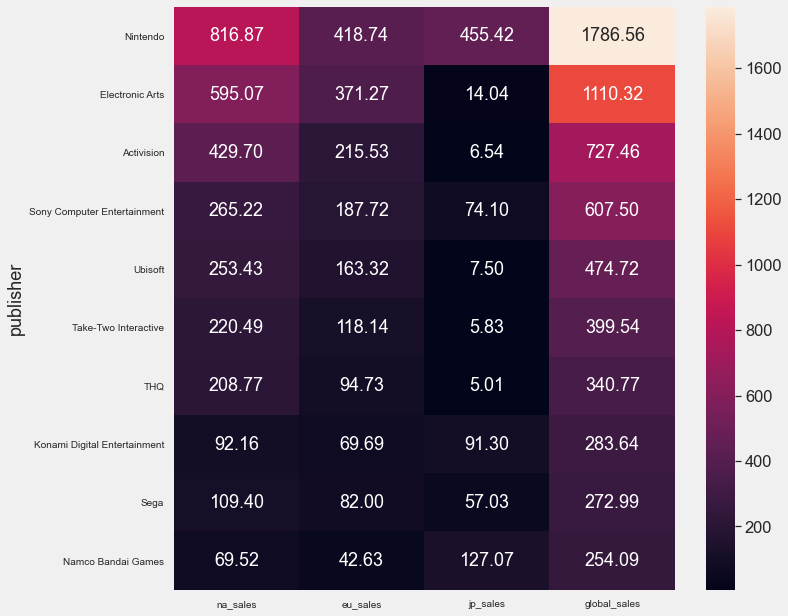

In [42]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)
sns.heatmap(publishers, annot = True, fmt = '.2f')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Text(0, 0.5, 'Sales')

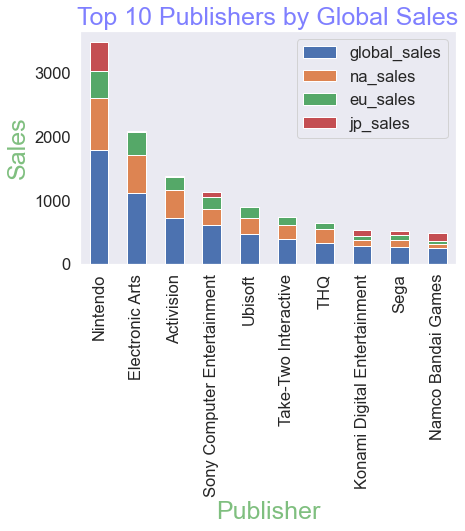

In [43]:
global_sales_publisher = vgSales.pivot_table(index=['publisher'], values=['global_sales','na_sales','eu_sales',
                                       'jp_sales'], aggfunc=np.sum).sort_values(['global_sales'], ascending=False)
global_sales_publisher = global_sales_publisher[['global_sales','na_sales','eu_sales','jp_sales']]
ax = global_sales_publisher.iloc[0:10,:].plot(kind='bar', stacked=True, grid=False)
ax.set_title('Top 10 Publishers by Global Sales', size=25, color='blue', alpha=0.5)
ax.set_xlabel('Publisher', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)

Just as I suspected, EA and Nintendo are among the top sellers. There are also some older companies on the list. This could indicate that gamers are insterested in buying from well known or nostolgic companies. 

## 4. Conclusion

So, **How have gamer buying trends changed throughout the years?** 

It appears that the trends have been consistent. Gamers have been buying games at the rate in which they have come out, and based on the list of best-selling games, the genre's have remained relatively the same. Based on all the gathered information, I have come to the conclusion gamers enjoy nostalgia, convience, and being able to game as a community. 

Thanks for reading my report!

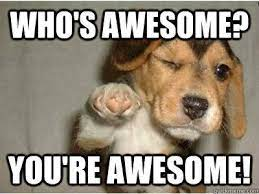